<a href="https://colab.research.google.com/github/harshyadav1508/Natural-Language-Processing-with-Transformers-book-code/blob/main/fine_tunning_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
! pip install -r requirements.txt

In [31]:
from datasets import load_dataset
emotions = load_dataset("emotion")

In [32]:
print(emotions)

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})


In [33]:
train_ds = emotions["train"]
print(len(train_ds))
print(train_ds[0])
print(train_ds.column_names)
print(train_ds.features)

16000
{'text': 'i didnt feel humiliated', 'label': 0}
['text', 'label']
{'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}


In [34]:
print(train_ds[:5])

{'text': ['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy'], 'label': [0, 0, 3, 2, 3]}


In [35]:
from transformers import AutoTokenizer
model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [36]:
text= "Tokenizing text is a core task of NLP."
encoded_text = tokenizer(text)
print(encoded_text)

tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

print(tokenizer.convert_tokens_to_string(tokens))

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}
['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'of', 'nl', '##p', '.', '[SEP]']
[CLS] tokenizing text is a core task of nlp. [SEP]


In [37]:
print(f"tokenizer.vocab_size: {tokenizer.vocab_size}")
print(f"tokenizer.model_max_length: {tokenizer.model_max_length}")
print(f"tokenizer.model_input_names: {tokenizer.model_input_names}")

tokenizer.vocab_size: 30522
tokenizer.model_max_length: 512
tokenizer.model_input_names: ['input_ids', 'attention_mask']


In [38]:
def tokenize(batch):
    return tokenizer((batch["text"]), padding=True, truncation=True)

emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)
print(emotions_encoded["train"].column_names)

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

['text', 'label', 'input_ids', 'attention_mask']


In [39]:
print(emotions_encoded["train"])
print(30*'- -')
print(emotions_encoded["train"][0])

Dataset({
    features: ['text', 'label', 'input_ids', 'attention_mask'],
    num_rows: 16000
})
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
{'text': 'i didnt feel humiliated', 'label': 0, 'input_ids': [101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}


In [40]:
from transformers import AutoModel
import torch

model_ckpt = "distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)

In [41]:
text = "this is a test"
inputs = tokenizer(text, return_tensors="pt")
print(f"inputs: {inputs}")
print(inputs['input_ids'])
print(f"Input tensor shape: {inputs['input_ids'].size()}")

inputs: {'input_ids': tensor([[ 101, 2023, 2003, 1037, 3231,  102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]])}
tensor([[ 101, 2023, 2003, 1037, 3231,  102]])
Input tensor shape: torch.Size([1, 6])


In [42]:
"""print(inputs)
with torch.no_grad():
    outputs = model(inputs['input_ids'],inputs['attention_mask'])
print(outputs)
"""

inputs = {k:v.to(device) for k,v in inputs.items()}
with torch.no_grad():
    outputs = model(**inputs)
print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ..., -0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]],
       device='cuda:0'), hidden_states=None, attentions=None)


In [43]:
for key, value in outputs.items():
    print(f"The size of {key} is {value.size()}")
outputs.last_hidden_state.size()

The size of last_hidden_state is torch.Size([1, 6, 768])


torch.Size([1, 6, 768])

In [44]:
def extract_hidden_states(batch):
    # Place model inputs on the GPU
    inputs = {k:v.to(device) for k,v in batch.items() if k in tokenizer.model_input_names}
    # Extract last hidden states
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state
    # Return vector for [CLS] token
    return {"hidden_state": last_hidden_state[:,0].cpu().numpy()}

emotions_encoded.set_format("torch", columns=["input_ids", "attention_mask", "label"])


In [45]:
emotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True)

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [46]:
print(emotions_hidden["train"].column_names)
print(emotions_hidden["train"][0])

['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']
{'label': tensor(0), 'input_ids': tensor([  101,  1045,  2134,  2102,  2514, 26608,   102,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0]), 'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [47]:
import numpy as np
X_train = np.array(emotions_hidden["train"]["hidden_state"])
X_valid = np.array(emotions_hidden["validation"]["hidden_state"])
y_train = np.array(emotions_hidden["train"]["label"])
y_valid = np.array(emotions_hidden["validation"]["label"])
X_train.shape, X_valid.shape


((16000, 768), (2000, 768))

In [48]:
# save X_train as csv file
np.savetxt("X_train.csv", X_train, delimiter=",")
# save X_valid as csv file
np.savetxt("X_valid.csv", X_valid, delimiter=",")


# save y_train as csv file
np.savetxt("y_train.csv", y_train, delimiter=",")
# save y_valid as csv file
np.savetxt("y_valid.csv", y_valid, delimiter=",")

In [49]:
! ls -lrth

total 337M
drwxr-xr-x 1 root root 4.0K Jul 11 13:22 sample_data
-rw-r--r-- 1 root root   90 Jul 14 11:29 requirements.txt
drwxr-xr-x 4 root root 4.0K Jul 14 11:40 distilbert-base-uncased-finetuned-emotion
-rw-r--r-- 1 root root 299M Jul 14 11:52 X_train.csv
-rw-r--r-- 1 root root  38M Jul 14 11:52 X_valid.csv
-rw-r--r-- 1 root root 391K Jul 14 11:52 y_train.csv
-rw-r--r-- 1 root root  49K Jul 14 11:52 y_valid.csv


In [58]:
print(X_train.shape, X_valid.shape)
print(y_train.shape, y_valid.shape)

(16000, 768) (2000, 768)
(16000,) (2000,)


# Fine-Tuning Transformers

In [50]:
from transformers import AutoModelForSequenceClassification
import torch

num_labels = 6
model_ckpt = "distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = (AutoModelForSequenceClassification
          .from_pretrained(model_ckpt, num_labels=num_labels)
          .to(device))

In [51]:
from sklearn.metrics import accuracy_score, f1_score
def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  f1 = f1_score(labels, preds, average="weighted")
  acc = accuracy_score(labels, preds)
  return {"accuracy": acc, "f1": f1}

In [52]:
from transformers import Trainer, TrainingArguments

batch_size = 64
logging_steps = len(emotions_encoded["train"]) // batch_size
model_name = f"{model_ckpt}-finetuned-emotion"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  push_to_hub=True,
                                  log_level="error")

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [54]:
from transformers import Trainer
trainer = Trainer(model=model, args=training_args,
                      compute_metrics=compute_metrics,
                    train_dataset=emotions_encoded["train"],
                    eval_dataset=emotions_encoded["validation"],
                    tokenizer=tokenizer)
trainer.train();

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.843300,0.319398,0.911000,0.910547
2,0.260500,0.230177,0.923000,0.923047


In [55]:
preds_output = trainer.predict(emotions_encoded["validation"])
preds_output.metrics

{'test_loss': 0.23017697036266327,
 'test_accuracy': 0.923,
 'test_f1': 0.92304659943046,
 'test_runtime': 4.1973,
 'test_samples_per_second': 476.502,
 'test_steps_per_second': 7.624}

In [63]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

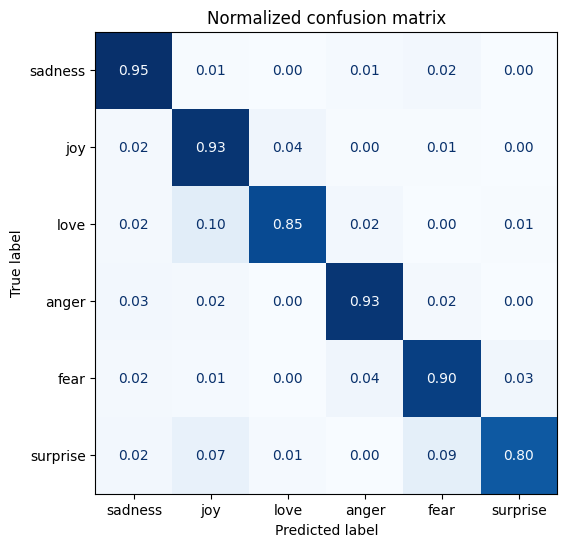

In [64]:
import numpy as np
import pandas as pd

labels = emotions["train"].features["label"].names
y_preds = np.argmax(preds_output.predictions, axis=1)
plot_confusion_matrix(y_preds, y_valid, labels)

In [69]:

from torch.nn.functional import cross_entropy

def forward_pass_with_label(batch):
    # Place all input tensors on the same device as the model
    inputs = {k:v.to(device) for k,v in batch.items()
              if k in tokenizer.model_input_names}

    with torch.no_grad():
        output = model(**inputs)
        pred_label = torch.argmax(output.logits, axis=-1)
        loss = cross_entropy(output.logits, batch["label"].to(device),
                             reduction="none")

    # Place outputs on CPU for compatibility with other dataset columns
    return {"loss": loss.cpu().numpy(),
            "predicted_label": pred_label.cpu().numpy()}

In [70]:
#hide_output
# Convert our dataset back to PyTorch tensors
emotions_encoded.set_format("torch",
                            columns=["input_ids", "attention_mask", "label"])
# Compute loss values
emotions_encoded["validation"] = emotions_encoded["validation"].map(
    forward_pass_with_label, batched=True, batch_size=16)

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [72]:
def label_int2str(row):
    return emotions["train"].features["label"].int2str(row)
emotions_encoded.set_format("pandas")
cols = ["text", "label", "predicted_label", "loss"]
df_test = emotions_encoded["validation"][:][cols]
df_test["label"] = df_test["label"].apply(label_int2str)
df_test["predicted_label"] = (df_test["predicted_label"]
                              .apply(label_int2str))

In [73]:
df_test.sort_values("loss", ascending=False).head(10)


,text,label,predicted_label,loss
882,i feel badly about reneging on my commitment t...,love,sadness,5.646183
465,i would eventually go in to these stores but i...,joy,fear,5.493577
1801,i feel that he was being overshadowed by the s...,love,sadness,5.382199
1274,i am going to several holiday parties and i ca...,joy,sadness,5.286838
1963,i called myself pro life and voted for perry w...,joy,sadness,5.247287
1870,i guess i feel betrayed because i admired him ...,joy,sadness,5.150778
1950,i as representative of everything thats wrong ...,surprise,sadness,5.127423
765,i feel super awkward and out of place right now,joy,sadness,5.072268
570,i don t mean this to be harsh selfish or uncar...,joy,anger,4.681430
1500,i guess we would naturally feel a sense of lon...,anger,sadness,4.464771


In [74]:
df_test.sort_values("loss", ascending=True).head(10)


,text,label,predicted_label,loss
1140,i do think about certain people i feel a bit d...,sadness,sadness,0.016421
1861,im tired of feeling lethargic hating to work o...,sadness,sadness,0.016934
697,i was missing him desperately and feeling idio...,sadness,sadness,0.016984
12,i woke up often got up around am feeling pukey...,sadness,sadness,0.017012
981,i would have to get off and walk the hill whic...,sadness,sadness,0.017047
1368,i started this blog with pure intentions i mus...,sadness,sadness,0.017114
1747,i feel personally ashamed that god made the sa...,sadness,sadness,0.017214
1155,im feeling a little groggy this morning since ...,sadness,sadness,0.017291
264,i am left feeling underwhelmed and ungrateful,sadness,sadness,0.017307
392,i remember feeling disheartened one day when w...,sadness,sadness,0.017320


In [75]:
trainer.push_to_hub(commit_message="Training completed!")


events.out.tfevents.1720957980.2d78b9f9e3cd.5726.1:   0%|          | 0.00/6.54k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/hyadav22/distilbert-base-uncased-finetuned-emotion/commit/3b2a3dad89769de4ad2369fe9c8589133318b120', commit_message='Training completed!', commit_description='', oid='3b2a3dad89769de4ad2369fe9c8589133318b120', pr_url=None, pr_revision=None, pr_num=None)

In [76]:
from transformers import pipeline


model_id = "hyadav22/distilbert-base-uncased-finetuned-emotion"
classifier = pipeline("text-classification", model=model_id)

# Then let's test the pipeline with a sample tweet:


custom_tweet = "I saw a movie today and it was really good."
preds = classifier(custom_tweet, return_all_scores=True)
print(preds)

config.json:   0%|          | 0.00/883 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


[[{'label': 'LABEL_0', 'score': 0.014676596038043499}, {'label': 'LABEL_1', 'score': 0.9535636305809021}, {'label': 'LABEL_2', 'score': 0.013253086246550083}, {'label': 'LABEL_3', 'score': 0.006579472217708826}, {'label': 'LABEL_4', 'score': 0.005591641645878553}, {'label': 'LABEL_5', 'score': 0.006335586309432983}]]


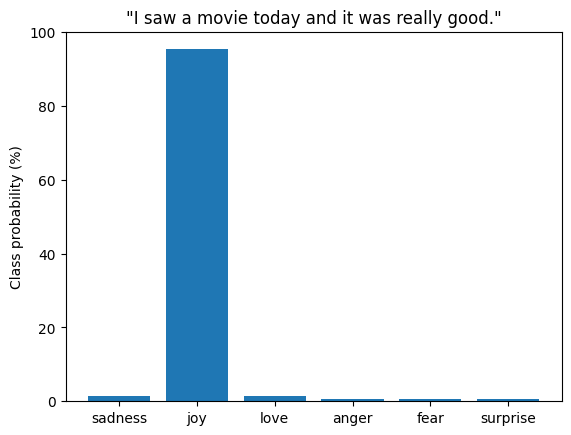

In [77]:
preds_df = pd.DataFrame(preds[0])
plt.bar(labels, 100 * preds_df["score"], color='C0')
plt.title(f'"{custom_tweet}"')
plt.ylabel("Class probability (%)")
plt.show()